In [10]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Read data
train=pd.read_csv("loan.csv")

In [12]:
# Features in the dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [13]:
# Print data types for each variable
train.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

In [14]:
# Shape of the dataset
train.shape

(614, 13)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID               614 non-null object
Gender                601 non-null object
Married               611 non-null object
Dependents            599 non-null object
Education             614 non-null object
Self_Employed         582 non-null object
Applicant_Income      614 non-null int64
Coapplicant_Income    614 non-null float64
Loan_Amount           592 non-null float64
Loan_Amount_Term      600 non-null float64
Credit_History        564 non-null float64
Property_Area         614 non-null object
Loan_Status           614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


## Univariate Analysis

In [16]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [17]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

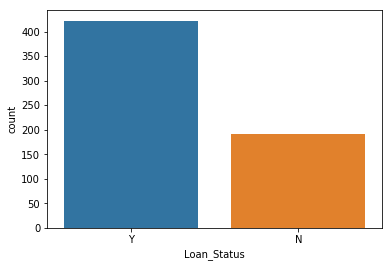

In [18]:
# Bar graph for load_status
sns.countplot(x="Loan_Status", data=train)

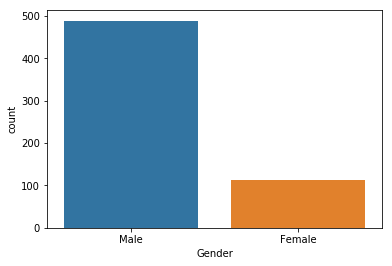

In [19]:
# Bar Graph for Gender
sns.countplot(x="Gender",data=train)

In [20]:
train.pivot_table(index="Loan_Status",columns="Gender",values="Loan_ID", aggfunc="count")

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


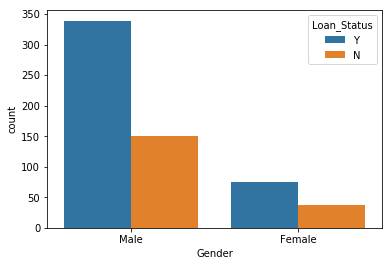

In [21]:
# Bar Graph for Gender
sns.countplot(x="Gender", hue="Loan_Status", data=train)

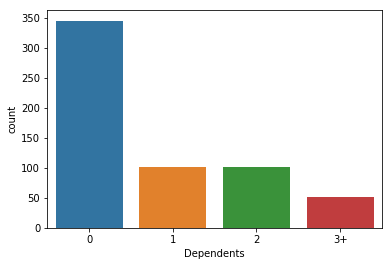

In [22]:
# Bar graph for dependents 
# train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')
sns.countplot(x="Dependents", data=train)

In [23]:
train['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

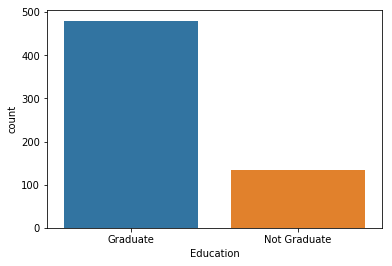

In [24]:
sns.countplot("Education", data =train)

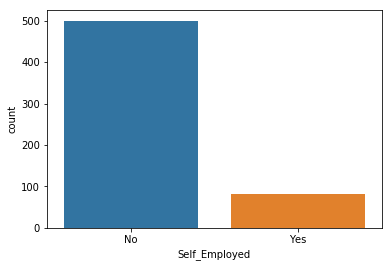

In [25]:
# Bar graph of Self_Employed
sns.countplot("Self_Employed",data=train)

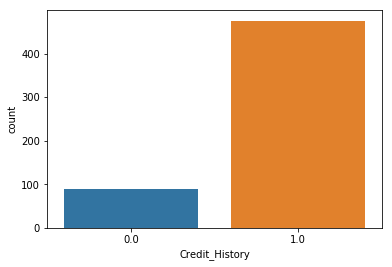

In [26]:
# Bar graph of Credit_History
sns.countplot(x='Credit_History',data=train)

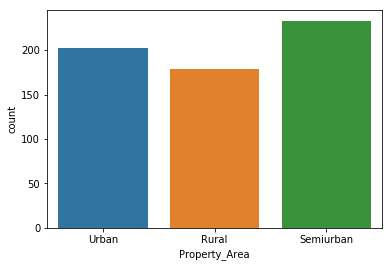

In [27]:
# Bar graph of Property_Area
sns.countplot(x='Property_Area',data=train)

## Continous variables 

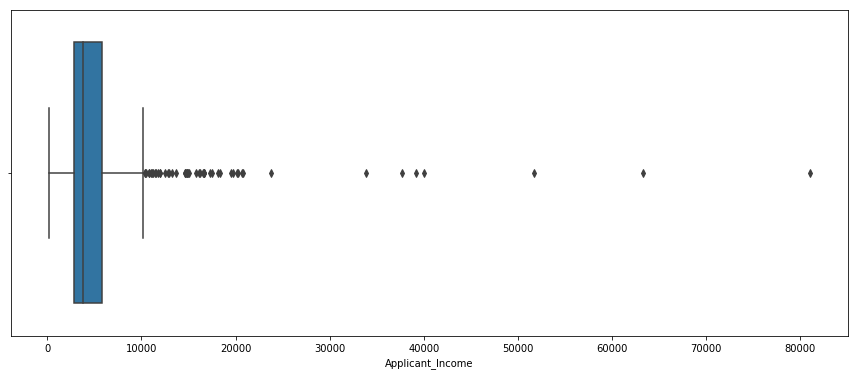

In [28]:
# Visualizing numerical features
fig,ax = plt.subplots( figsize=(15,6))
sns.boxplot(x="Applicant_Income",data=train, ax= ax)

d:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


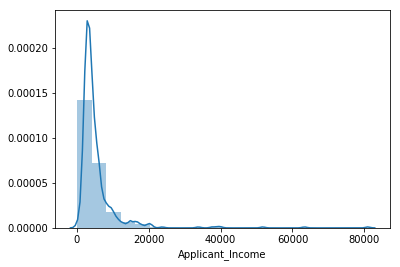

In [29]:
sns.distplot(train["Applicant_Income"], bins=20) 

Text(0.5, 0.98, '')

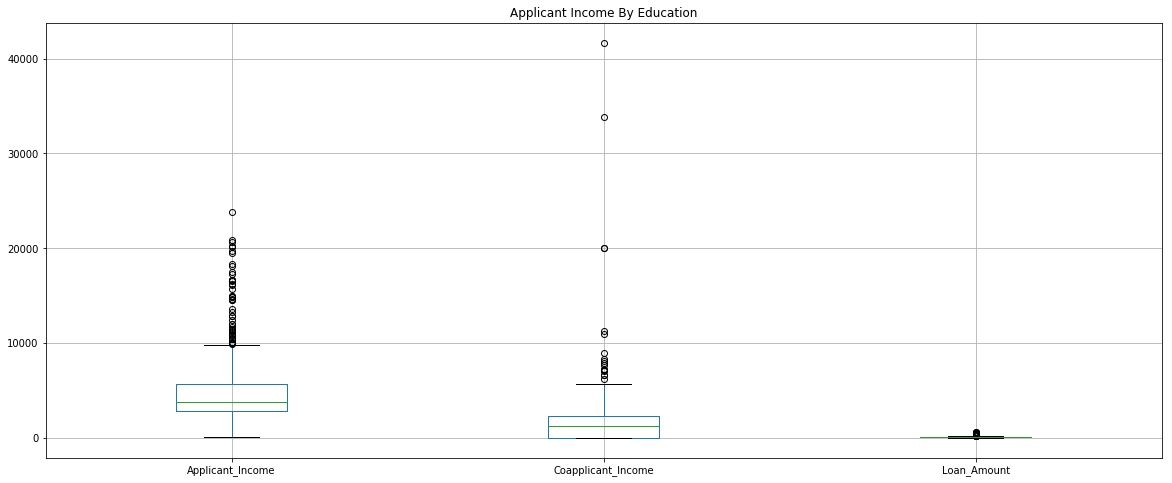

In [30]:
#train.boxplot(column='Applicant_Income', by = 'Education', figsize=(20,6))
train.loc[ train['Applicant_Income'] < 30000, ['Applicant_Income','Coapplicant_Income','Loan_Amount']].boxplot(figsize=(20,8))
plt.title("Applicant Income By Education")
plt.suptitle("")  # Suppress default title

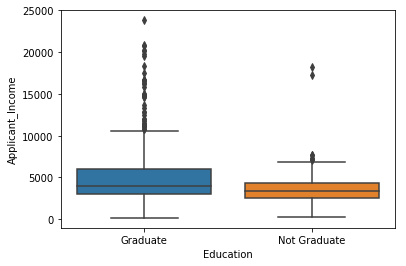

In [31]:
sns.boxplot(x="Education",y="Applicant_Income",data=train[train['Applicant_Income'] < 30000])

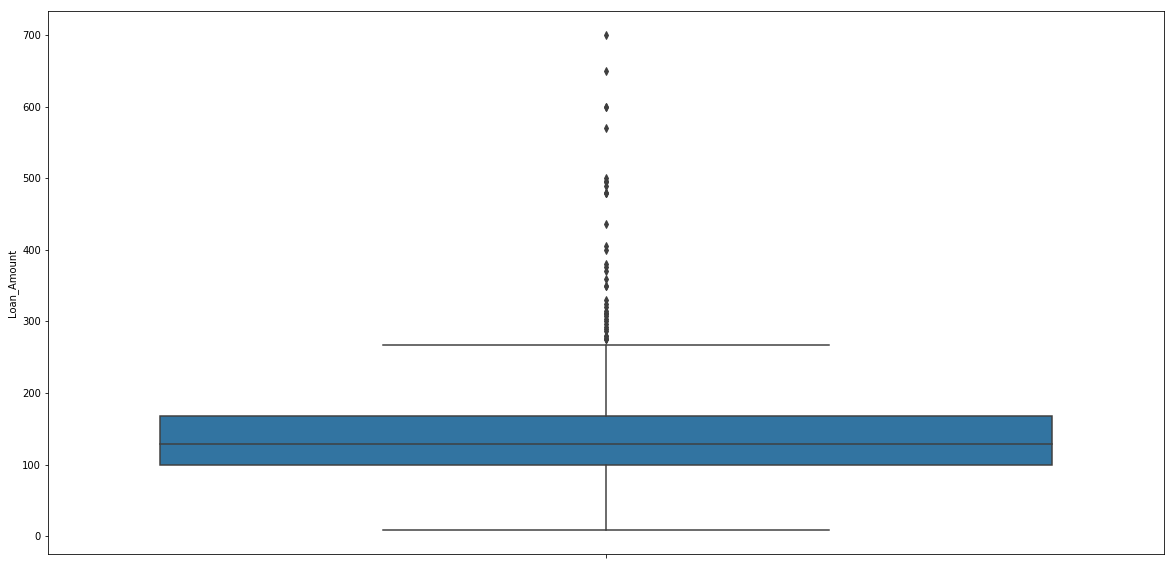

In [32]:
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(train["Loan_Amount"] , orient="v", ax = ax)

## Bivariate Analysis

  Loan_Status  Gender Married  Count
0           N  Female      No     29
1           N  Female     Yes      8
2           N    Male      No     49
3           N    Male     Yes    101
4           Y  Female      No     51
5           Y  Female     Yes     23
6           Y    Male      No     81
7           Y    Male     Yes    256


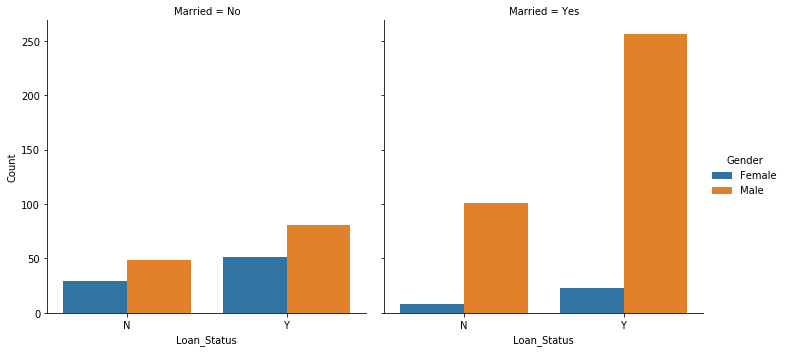

In [33]:
d = train.groupby(by=["Loan_Status","Gender","Married"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Loan_Status",y="Count",hue="Gender",col="Married", data=d, kind="bar")

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>


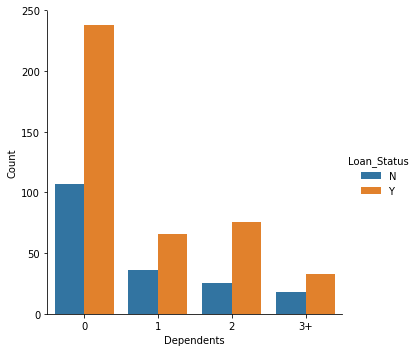

In [34]:
g = train.groupby(by=["Loan_Status","Dependents"], as_index=False)['Loan_ID']
print(type(g))
d = train.groupby(by=["Loan_Status","Dependents"], as_index=False)['Loan_ID'].count()
print(type(d))
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
sns.catplot(x="Dependents",y="Count", hue="Loan_Status", data=d, kind="bar")

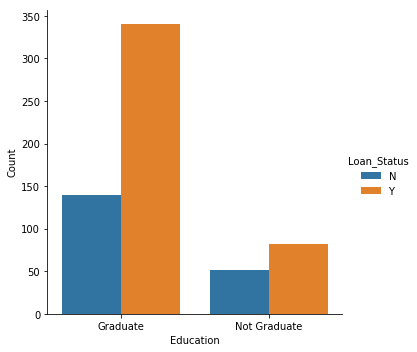

In [35]:
d = train.groupby(by=["Loan_Status","Education"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
sns.catplot(x="Education",y="Count", hue="Loan_Status", data=d, kind="bar")

  Loan_Status Self_Employed  Count
0           N            No    157
1           N           Yes     26
2           Y            No    343
3           Y           Yes     56


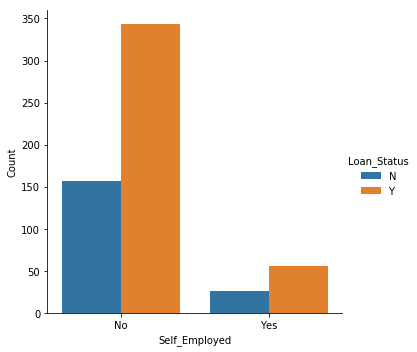

In [36]:
d = train.groupby(by=["Loan_Status","Self_Employed"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Self_Employed",y="Count", hue="Loan_Status", data=d, kind="bar")

  Loan_Status  Credit_History  Count
0           N             0.0     82
1           N             1.0     97
2           Y             0.0      7
3           Y             1.0    378


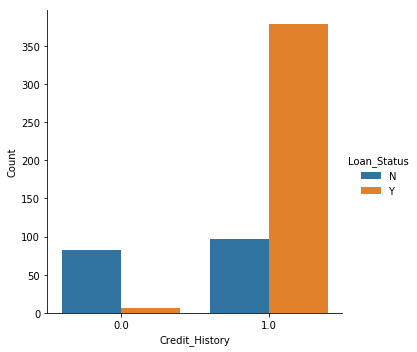

In [37]:
d = train.groupby(by=["Loan_Status","Credit_History"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Credit_History",y="Count", hue="Loan_Status", data=d, kind="bar")

  Loan_Status Property_Area  Count
0           N         Rural     69
1           N     Semiurban     54
2           N         Urban     69
3           Y         Rural    110
4           Y     Semiurban    179
5           Y         Urban    133


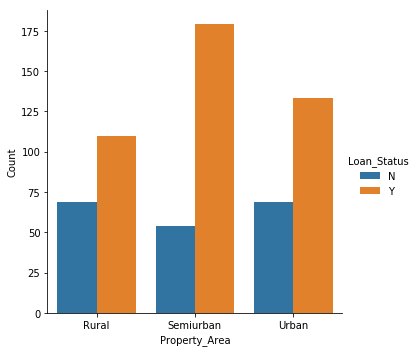

In [38]:
d = train.groupby(by=["Loan_Status","Property_Area"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Property_Area",y="Count", hue="Loan_Status", data=d, kind="bar")

In [39]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_Bin'] = pd.cut(train['Applicant_Income'],bins,labels=group)

In [40]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


  Loan_Status Income_Bin  Count
0           N        Low     34
1           N    Average     67
2           N       High     45
3           N  Very high     46
4           Y        Low     74
5           Y    Average    159
6           Y       High     98
7           Y  Very high     91


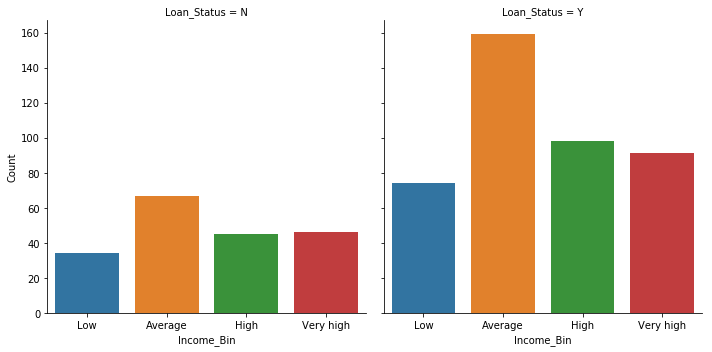

In [41]:
d = train.groupby(by=["Loan_Status","Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Income_Bin",y="Count", col="Loan_Status", data=d, kind="bar")

In [42]:
# Making bins for Coapplicant income variable
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_Bin']=pd.cut(train['Coapplicant_Income'],bins,labels=group)

  Loan_Status Coapplicant_Income_Bin  Count
0           N                    Low      3
1           N                Average     61
2           N                   High     32
3           Y                    Low     19
4           Y                Average    161
5           Y                   High     65


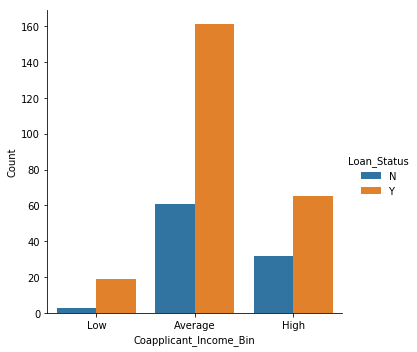

In [43]:
d = train.groupby(by=["Loan_Status","Coapplicant_Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Coapplicant_Income_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [44]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_Bin']=pd.cut(train['Loan_Amount'],bins,labels=group)
#train['LoanAmount_Bin']= pd.qcut( train["Loan_Amount"],5)                                 

In [45]:
# train.drop(['LoanAmount_Bin'], axis=1, inplace=True)

  Loan_Status LoanAmount_Bin  Count
0           N            Low     47
1           N        Average    103
2           N           High     31
3           Y            Low    107
4           Y        Average    255
5           Y           High     49


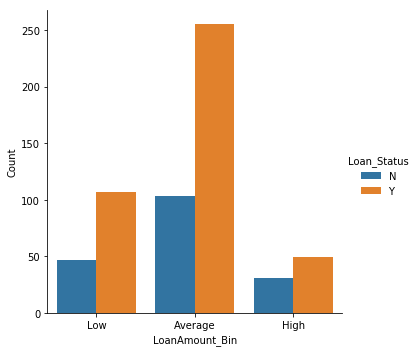

In [46]:
d = train.groupby(by=["Loan_Status","LoanAmount_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="LoanAmount_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

## Data Transformation

In [47]:
# Drop the new variable of bins
train=train.drop(['Income_Bin', 'Coapplicant_Income_Bin', 'LoanAmount_Bin'], axis=1)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID               614 non-null object
Gender                601 non-null object
Married               611 non-null object
Dependents            599 non-null object
Education             614 non-null object
Self_Employed         582 non-null object
Applicant_Income      614 non-null int64
Coapplicant_Income    614 non-null float64
Loan_Amount           592 non-null float64
Loan_Amount_Term      600 non-null float64
Credit_History        564 non-null float64
Property_Area         614 non-null object
Loan_Status           614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [49]:
# Convert Dependents to str 
train['Dependents'] = train["Dependents"].astype('str')

In [50]:
train['Dependents'].value_counts()

0      345
1      102
2      101
3+      51
nan     15
Name: Dependents, dtype: int64

In [51]:
# replacing 3+ in Dependents variable with 3
# train['Dependents'].replace(to_replace = ['0', '1', '2', '3+'], value=['0', '1','2', '3'],inplace=True)
# ctrain = train.copy()
train.loc[ train["Dependents"] == '3+', ['Dependents'] ] = '3'

In [52]:
train['Dependents'].value_counts()

0      345
1      102
2      101
3       51
nan     15
Name: Dependents, dtype: int64

In [53]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

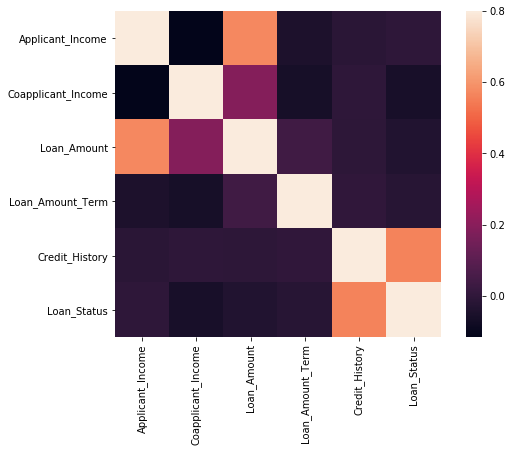

In [54]:
# Print correlation matrix to understand relationship between variables
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8,square=True)

### Missing value and outlier treatment

In [55]:
# Checking the missing values
train.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents             0
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [56]:
# replacing the missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [57]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

In [58]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [59]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [60]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [61]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [62]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [63]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [64]:
train['Loan_Amount'].mean()

146.41216216216216

In [65]:
train['Loan_Amount'].median()

128.0

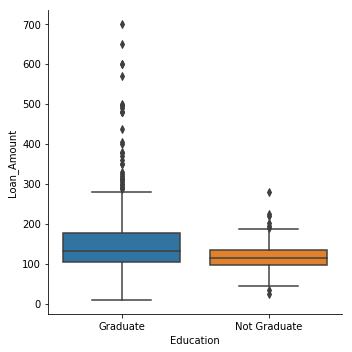

In [66]:
sns.catplot(x= "Education", y="Loan_Amount", data = train, kind='box')

In [67]:
# impute loan_amount by taking mean of education category 
gmean = train.loc [train["Education"] == 'Graduate', 'Loan_Amount'].mean()
ngmean = train.loc [train["Education"] == 'Not Graduate', 'Loan_Amount'].mean()
gmean, ngmean

(154.06021505376344, 118.40944881889764)

In [68]:
# train.loc[train["Education"] == 'Graduate','Loan_Amount'].fillna(gmean, inplace=True)
# train.loc[train["Education"] == 'Not Graduate','Loan_Amount'].fillna(ngmean, inplace=True)

In [69]:
train.loc[(train["Education"] == 'Graduate') & (train["Loan_Amount"].isna()) , 'Loan_Amount'] = gmean

In [70]:
train.loc[(train["Education"] == 'Not Graduate') & (train["Loan_Amount"].isna()) , 'Loan_Amount'] = ngmean

In [71]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
train=train.drop('Loan_ID',axis=1)

In [87]:
y = train['Loan_Status']
X = train.drop('Loan_Status',axis=1)
y.shape, X.shape

((614,), (614, 11))

In [88]:
X1 = X.copy()

In [89]:
# Adding dummies to the dataset
X = pd.get_dummies(X)

In [90]:
X.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3', 'Dependents_nan', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [77]:
X['Dependents_nan'].value_counts()

0    599
1     15
Name: Dependents_nan, dtype: int64

In [91]:
y.shape, X.shape

((614,), (614, 21))

In [92]:
X.to_csv("loan_final.csv")
y.to_csv("loan_status_final.csv")

In [93]:
# load data from files 
Xd = pd.read_csv("loan_final.csv")
yd = pd.read_csv("loan_status_final.csv")
Xd.shape, yd.shape

((614, 22), (613, 2))

## Build Model using Logistic Regression

In [94]:
# Importing packages for cross validation and logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Split data into train and test data 

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [96]:
# logistic regression   
model = LogisticRegression()
model.fit(X_train,y_train)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [97]:
# Display score
print(model.score(X_test, y_test))

0.8373983739837398


In [98]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [99]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[15, 18],
       [ 2, 88]], dtype=int64)

In [100]:
y_test.shape

(123,)

In [101]:
(15+88)/ (123)

0.8373983739837398

### classification report

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

   micro avg       0.84      0.84      0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [114]:
model.coef_

array([[ 7.19278154e-06, -5.91213331e-05, -1.47340966e-03,
        -3.38350640e-03,  2.66100207e+00,  7.41273782e-02,
        -8.40744238e-02, -1.40136313e-01,  1.30189267e-01,
        -1.92333934e-02, -2.38718153e-01,  1.25660691e-01,
         1.53932395e-01, -3.15885849e-02,  1.32413944e-01,
        -1.42360990e-01, -9.20247818e-02,  8.20777362e-02,
        -2.31214567e-01,  3.01258159e-01, -7.99906376e-02]])

## 28-FEB-2019

In [104]:
X.head()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3,Dependents_nan,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,154.060215,360.0,1.0,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1


In [162]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7792207792207793


### Display confusion matrix

In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[27, 32],
       [ 2, 93]], dtype=int64)

### Display classification report

In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.46      0.61        59
          1       0.74      0.98      0.85        95

avg / total       0.82      0.78      0.76       154



### Feature Engineering

In [144]:
# Total_Income feature
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


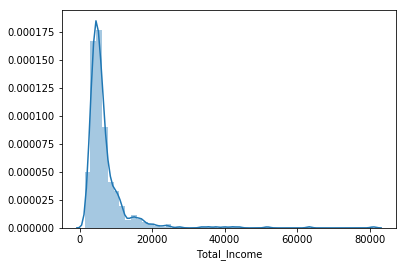

In [145]:
sns.distplot(train['Total_Income']);

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


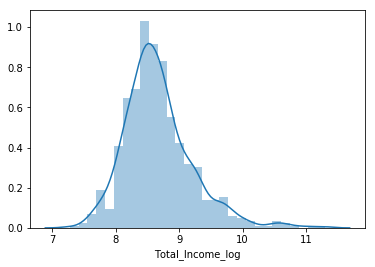

In [146]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);

In [147]:
# EMI feature
train['EMI']=(train['LoanAmount']/train['Loan_Amount_Term'])*1000

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


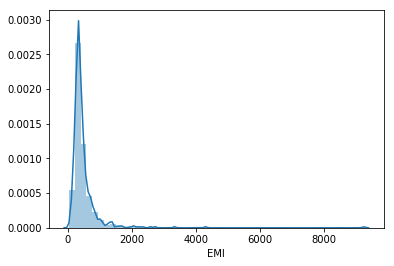

In [148]:
sns.distplot(train['EMI']);

In [149]:
# Balance Income feature
train['Balance Income']=train['Total_Income']-(train['EMI']) 

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


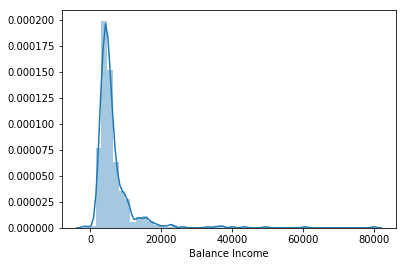

In [150]:
sns.distplot(train['Balance Income']);

### Logistic Regression after adding features 

In [153]:
train.shape

(614, 26)

In [154]:
y.shape

(614,)

### Split data into train and test data 

In [151]:
X_train, X_test, y_train, y_test = train_test_split(train,y)

In [152]:
# logistic regression   
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [156]:
pred_test = model.predict(X_test)
score = accuracy_score(y_test,pred_test)
print('accuracy_score',score)   

accuracy_score 0.7792207792207793


## Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier 

In [108]:
y = train['Loan_Status']
X = train.drop('Loan_Status',axis=1)

((614,), (614, 11))

In [110]:
# Adding dummies to the dataset
X = pd.get_dummies(X)
y.shape, X.shape

((614,), (614, 21))

In [111]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [114]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score :',score)   

Accuracy_score : 1.0


In [113]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[33,  0],
       [ 0, 90]], dtype=int64)

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        90

   micro avg       1.00      1.00      1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



### Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [178]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7077922077922078


## Naive Bayes 

In [185]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import 

In [180]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None)

In [181]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7662337662337663


In [183]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[30, 29],
       [ 7, 88]], dtype=int64)

In [184]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.81      0.51      0.62        59
          1       0.75      0.93      0.83        95

avg / total       0.77      0.77      0.75       154

